In [1]:
pip install pandas matplotlib jupyter


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 4.3 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 4.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.6 MB/s 

In [65]:
from IPython.display import display, HTML

display(HTML("<style>.output_area { max-width: 100%;  max-height: 8000px }</style>"))


Choose 2 people - Best Couple Award ['João', 'Maike']
Choose 2 people - Best Couple Award ['João', 'Maike']
Choose 2 people - Best Couple Award ['Eleni', 'Maike']
Choose 2 people - Best Couple Award ['Eleni', 'Maike']
Choose 2 people - Best Couple Award ['Lina', 'Maike']


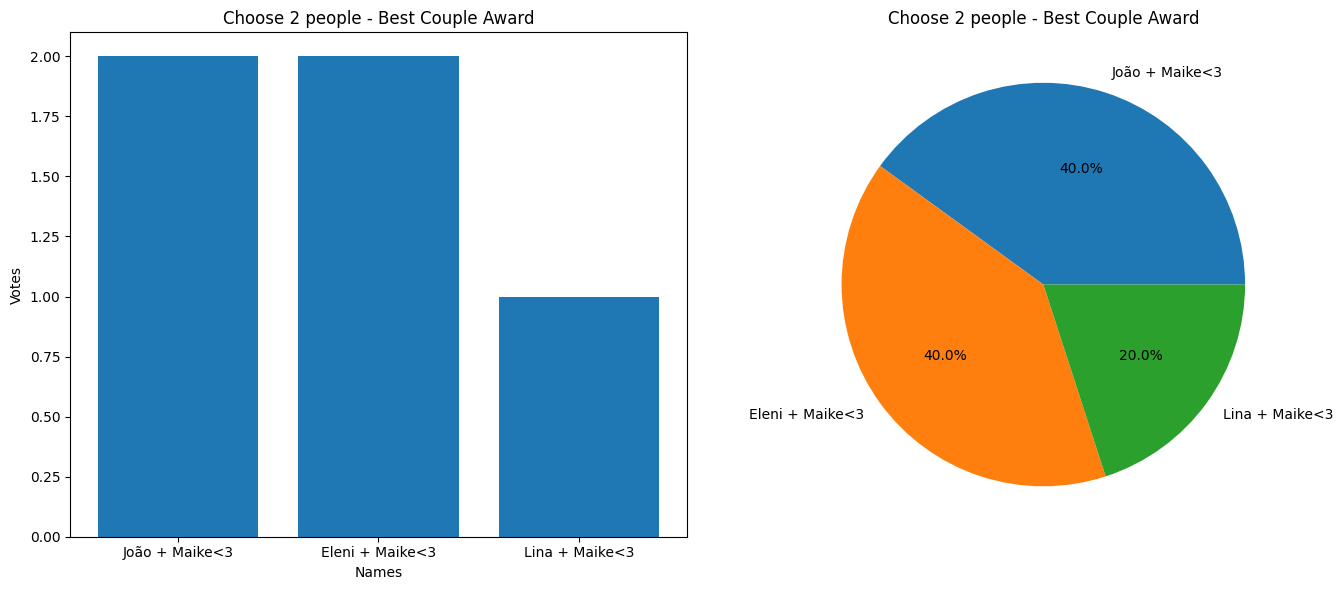

Choose 3 people - Best Throuple Award ['Siemen', 'Simon', 'Simone']
Choose 3 people - Best Throuple Award ['Siemen', 'Simon', 'Simone']
Choose 3 people - Best Throuple Award ['Siemen', 'Simon', 'Simone']
Choose 3 people - Best Throuple Award ['Siemen', 'Simon', 'Simone']
Choose 3 people - Best Throuple Award ['Siemen', 'Simon', 'Simone']


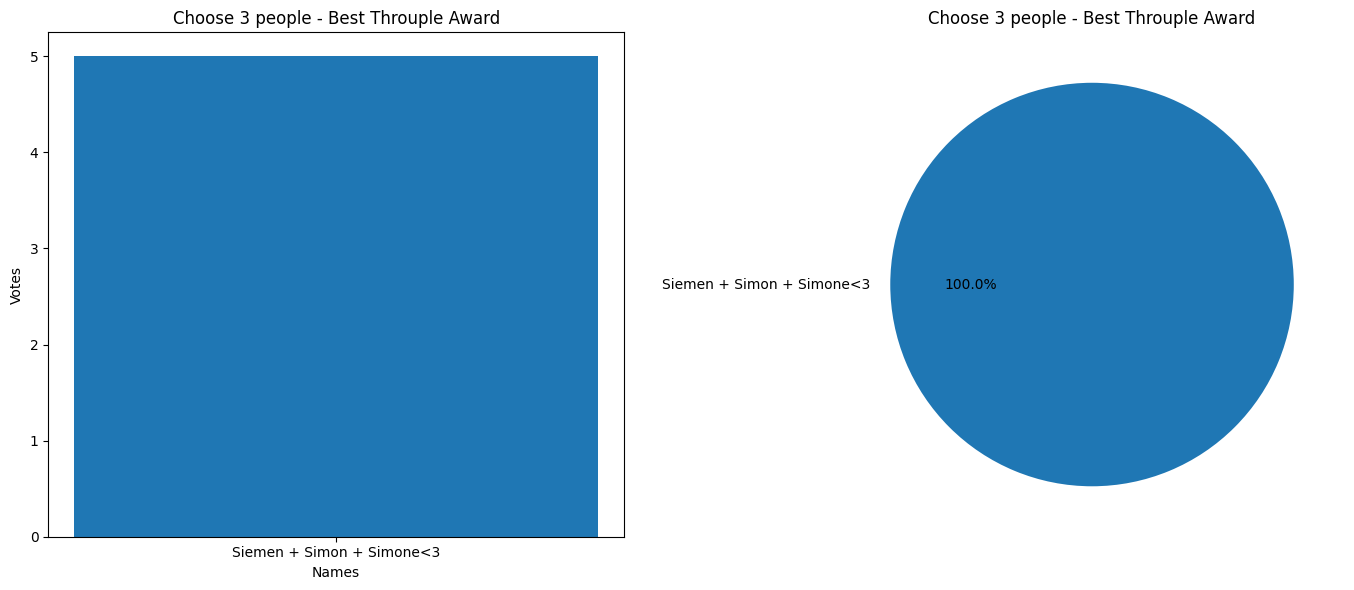

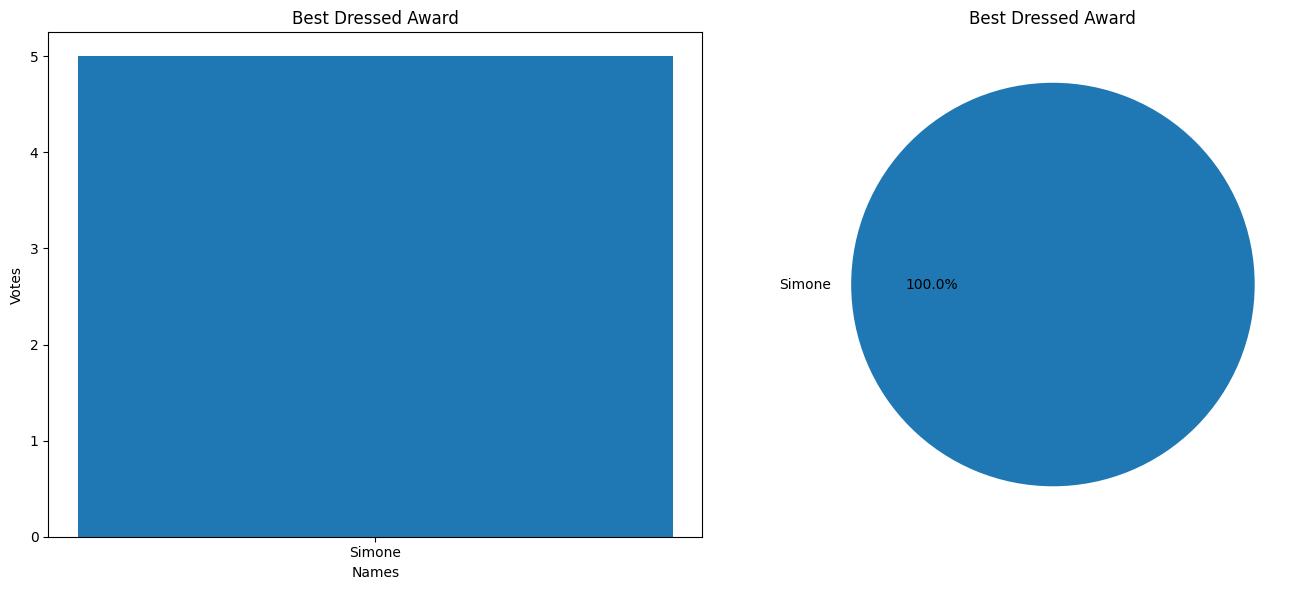

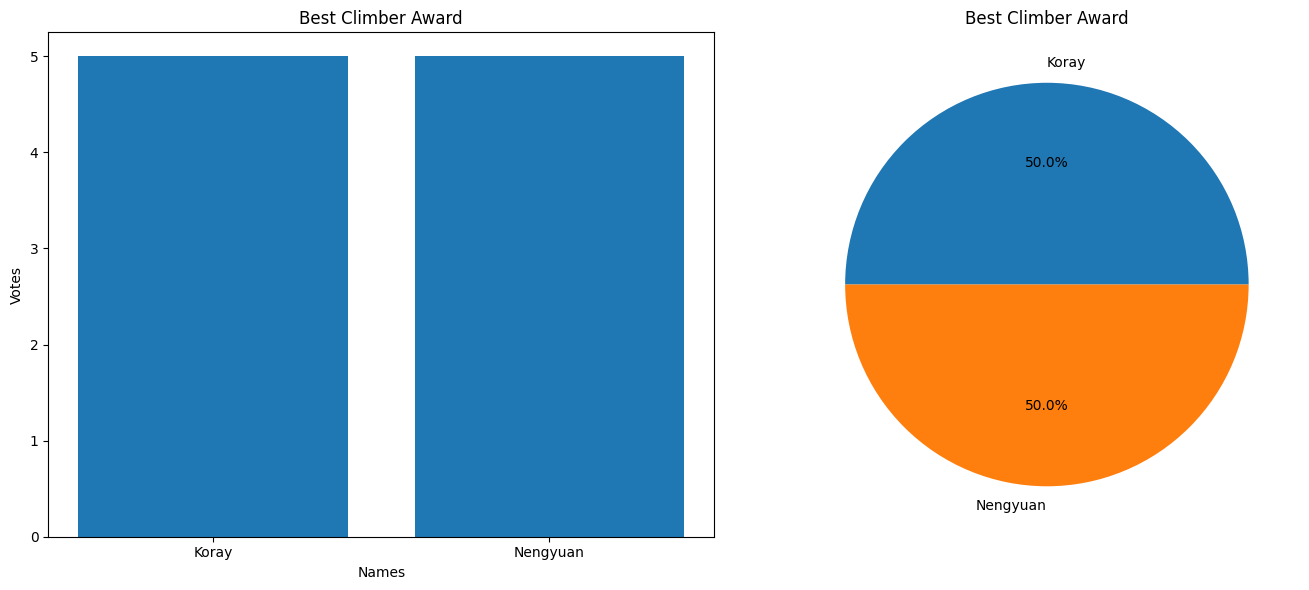

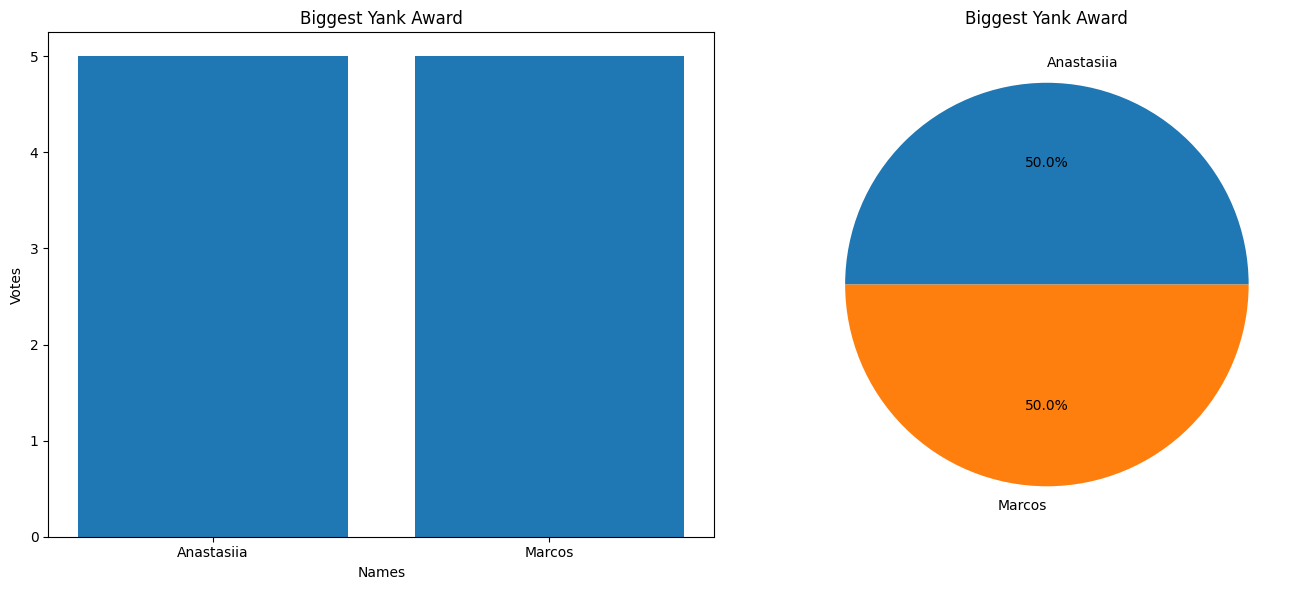

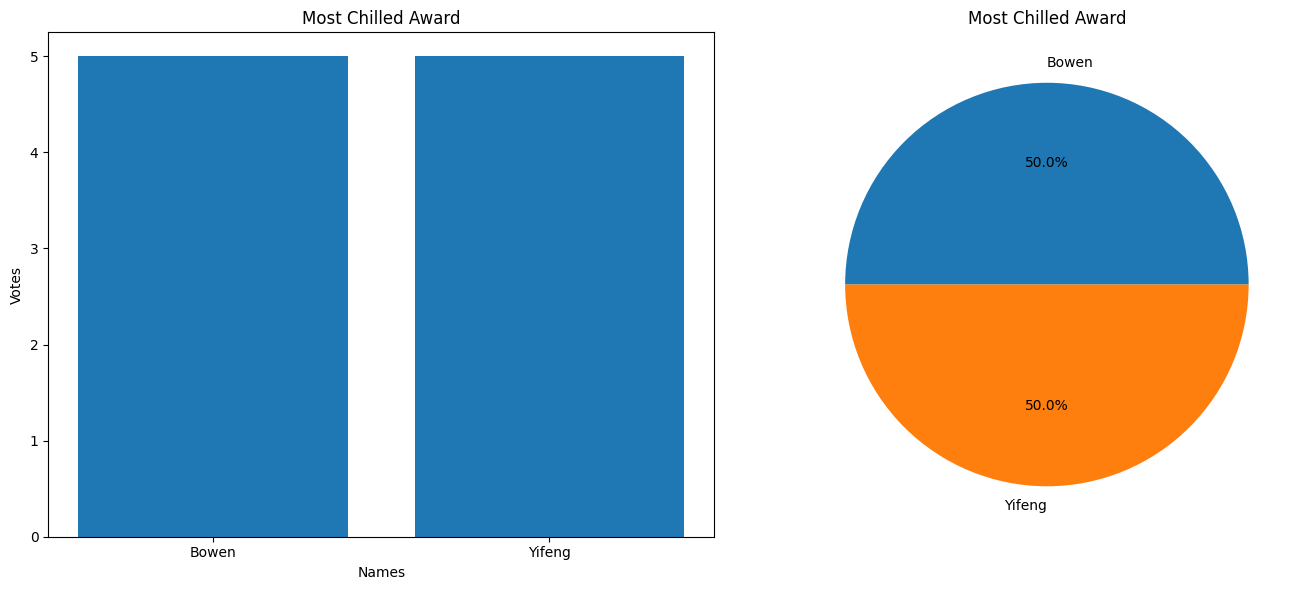

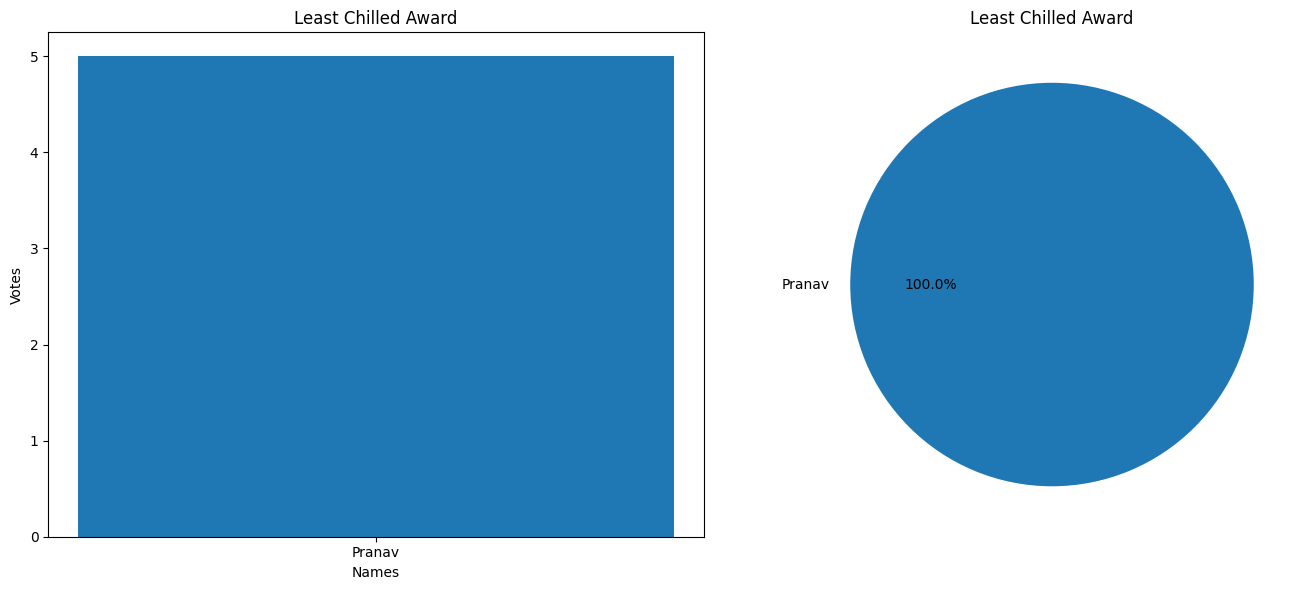

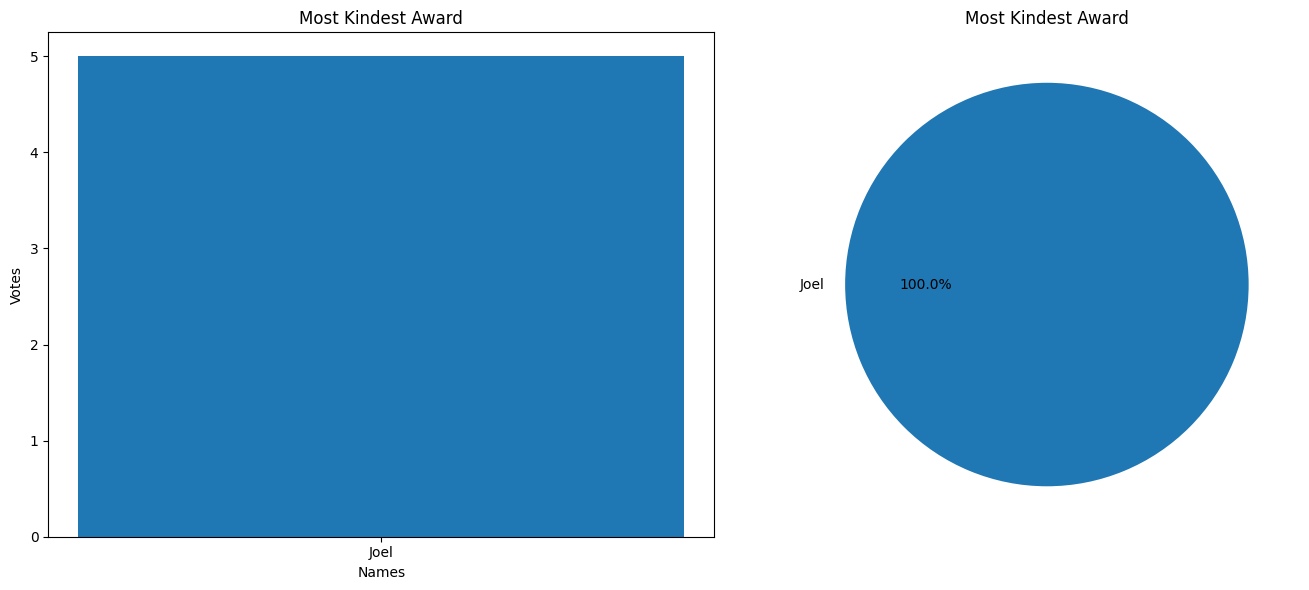

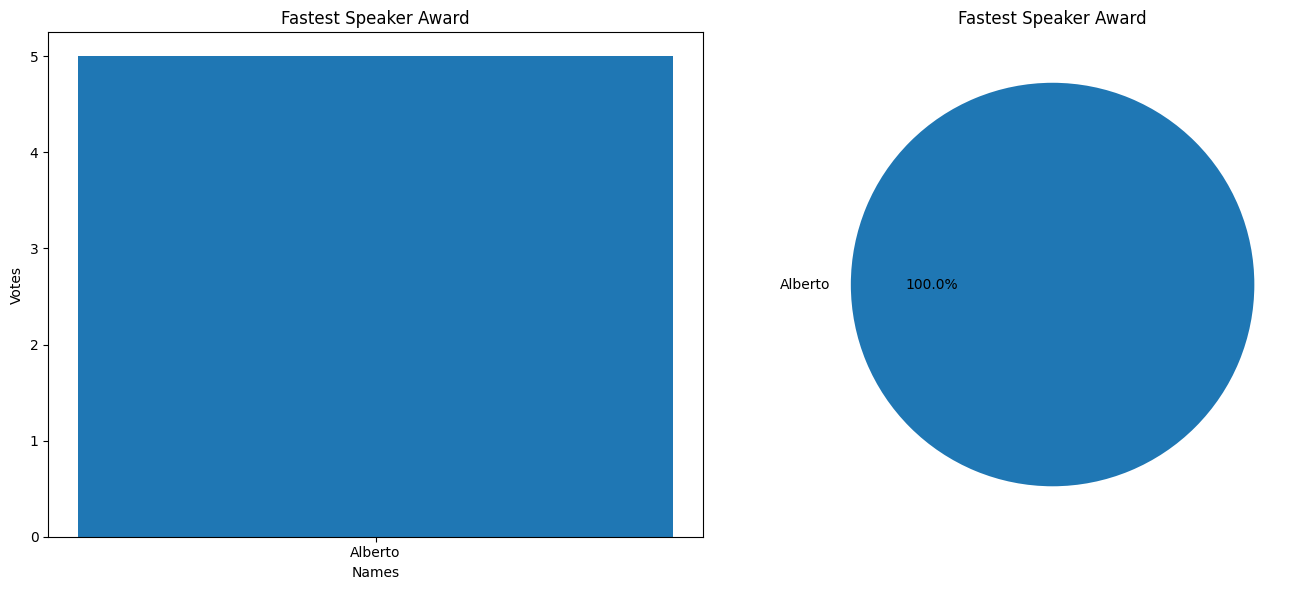

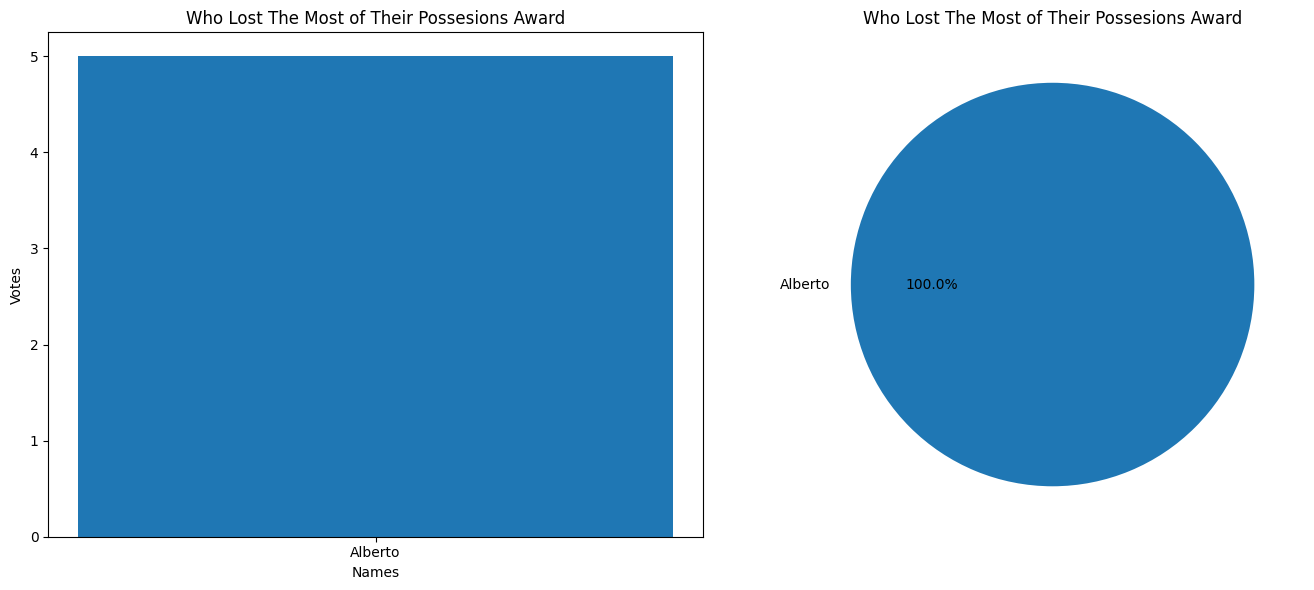

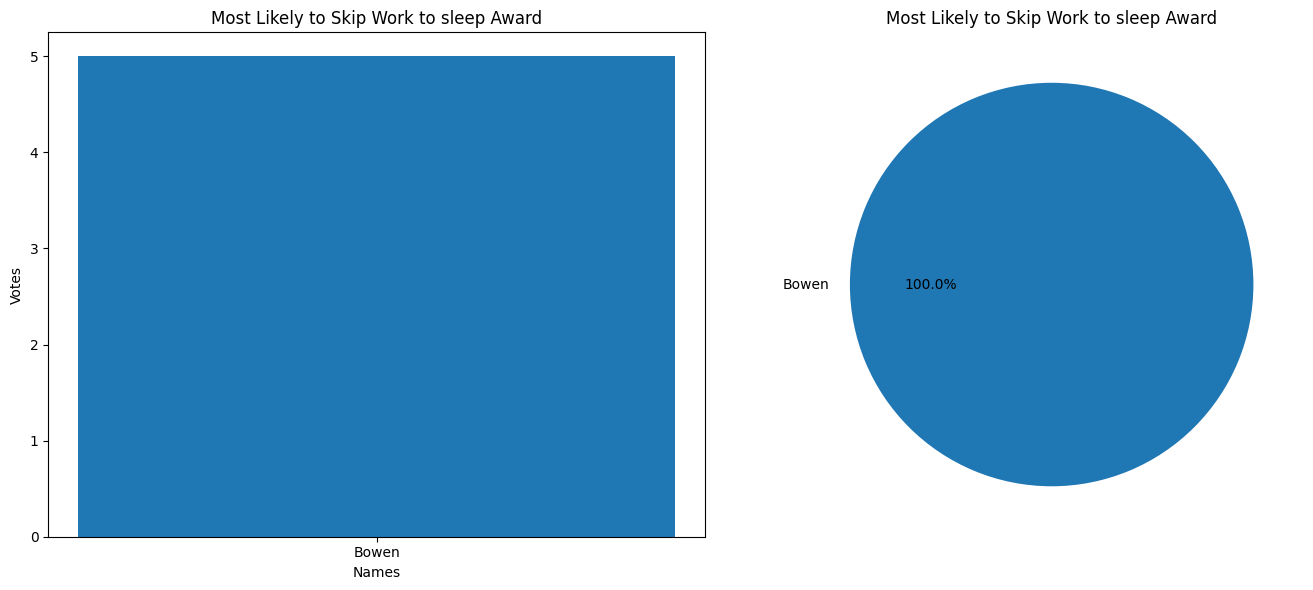

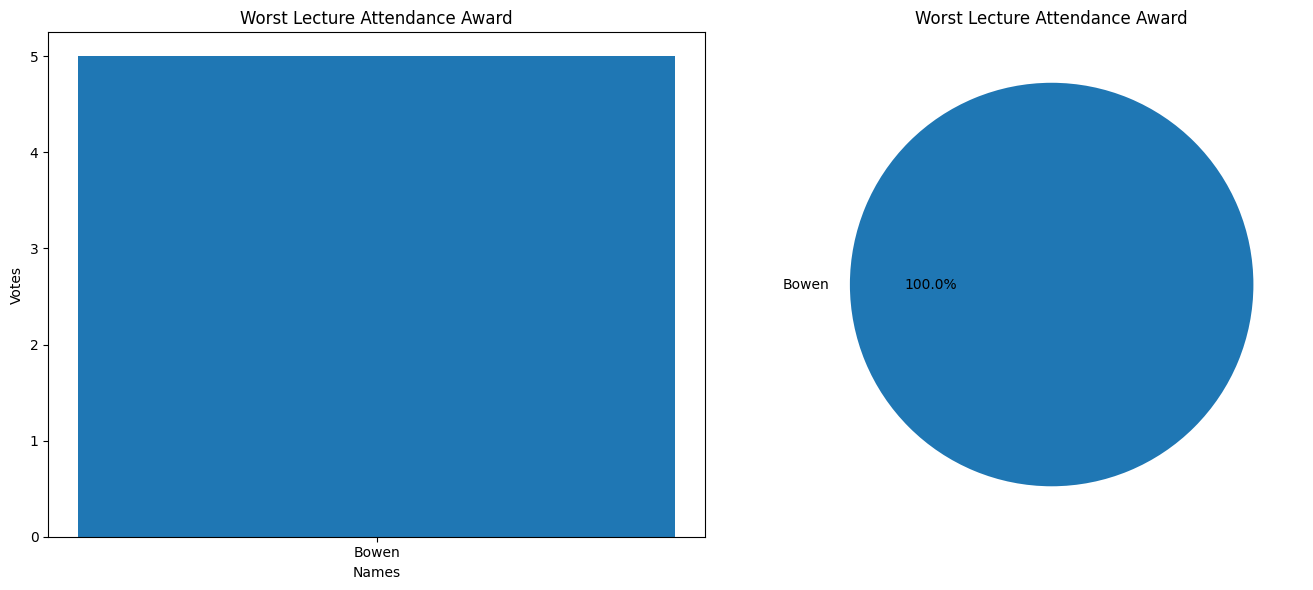

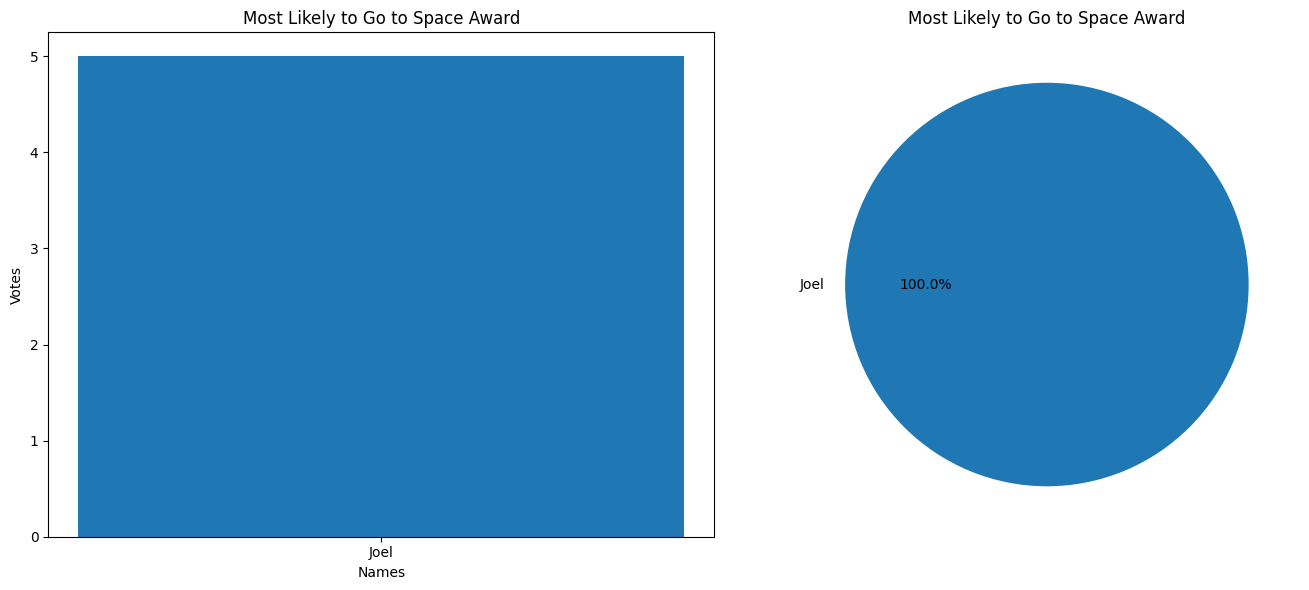

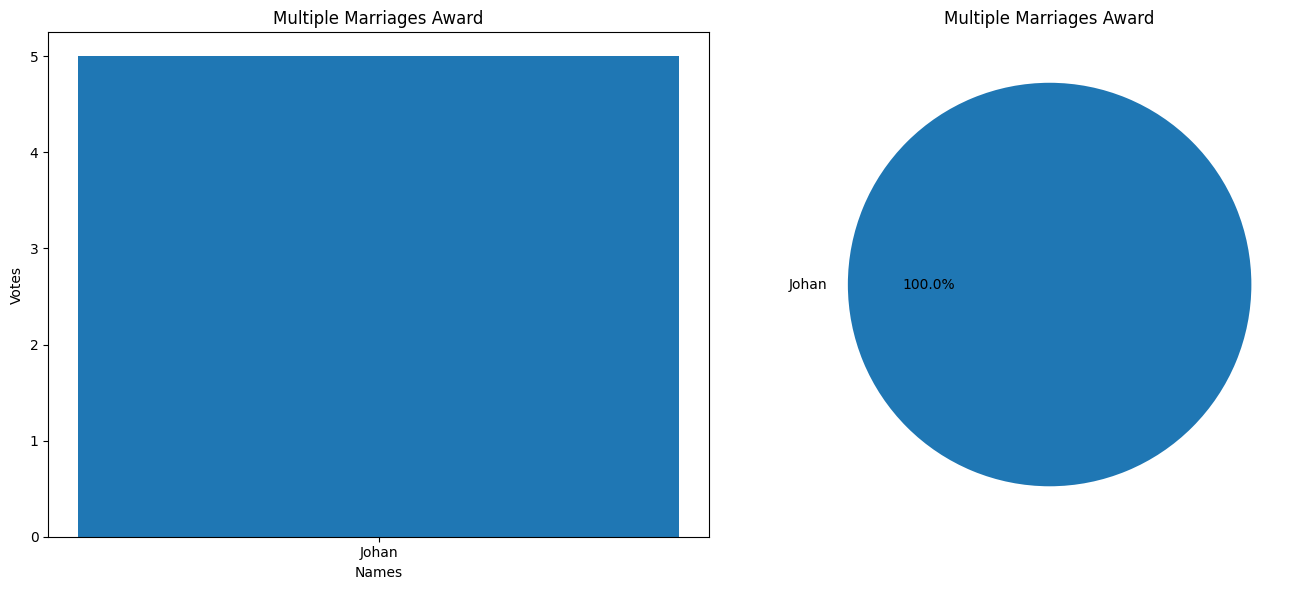

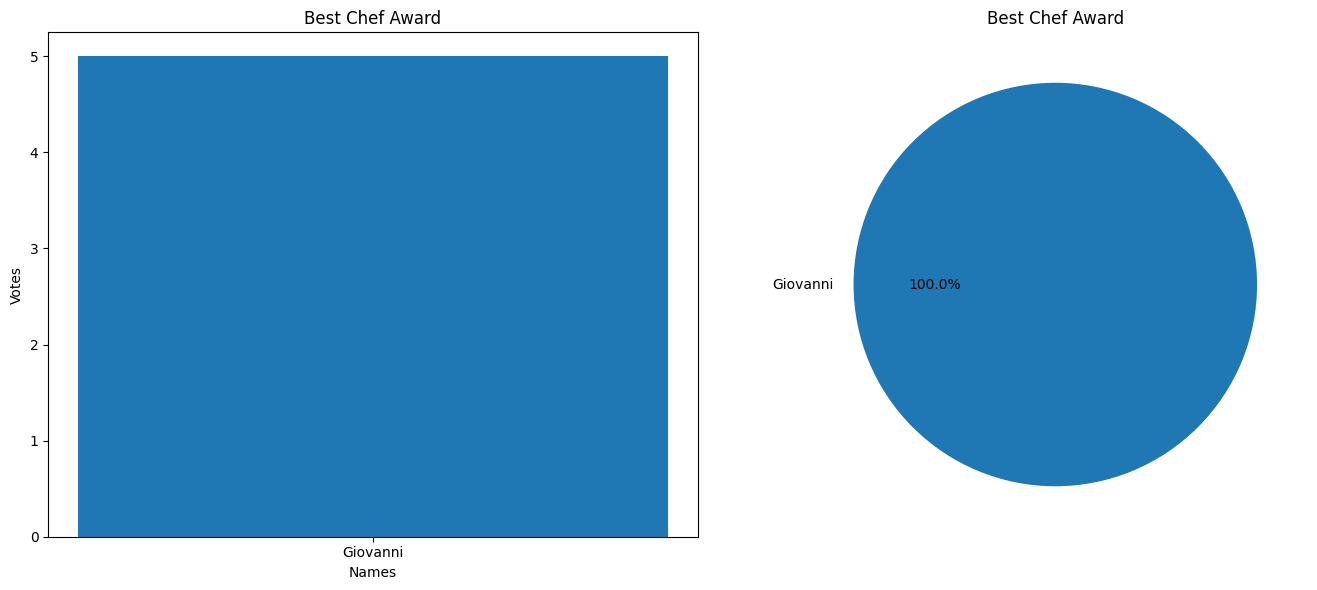

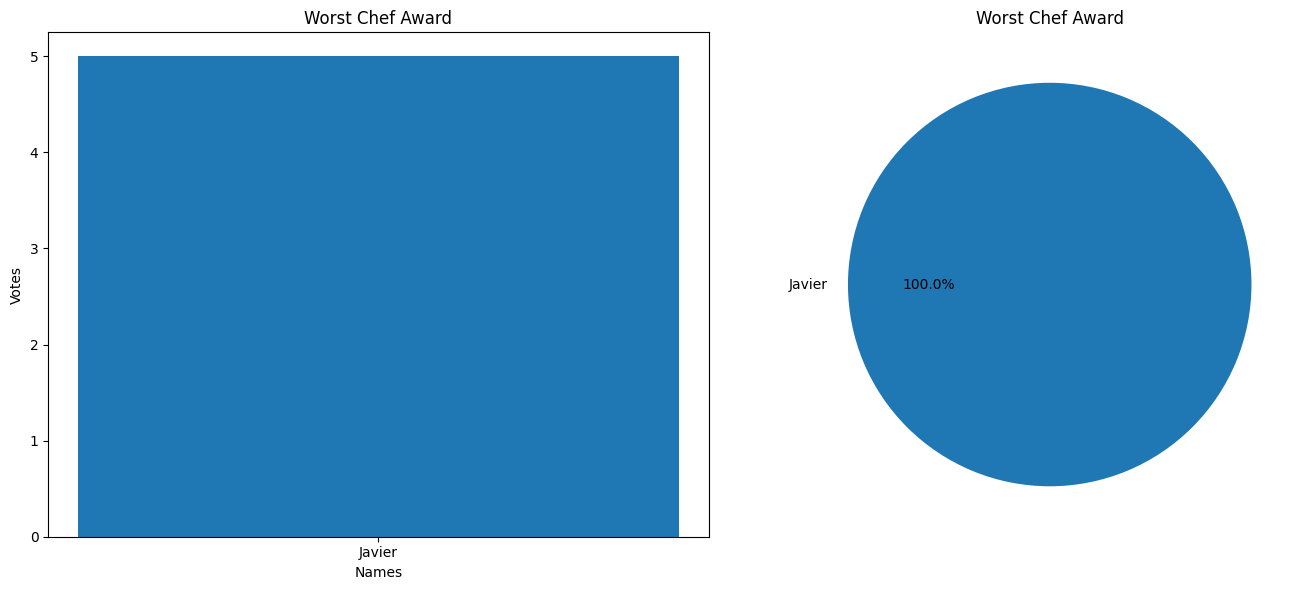

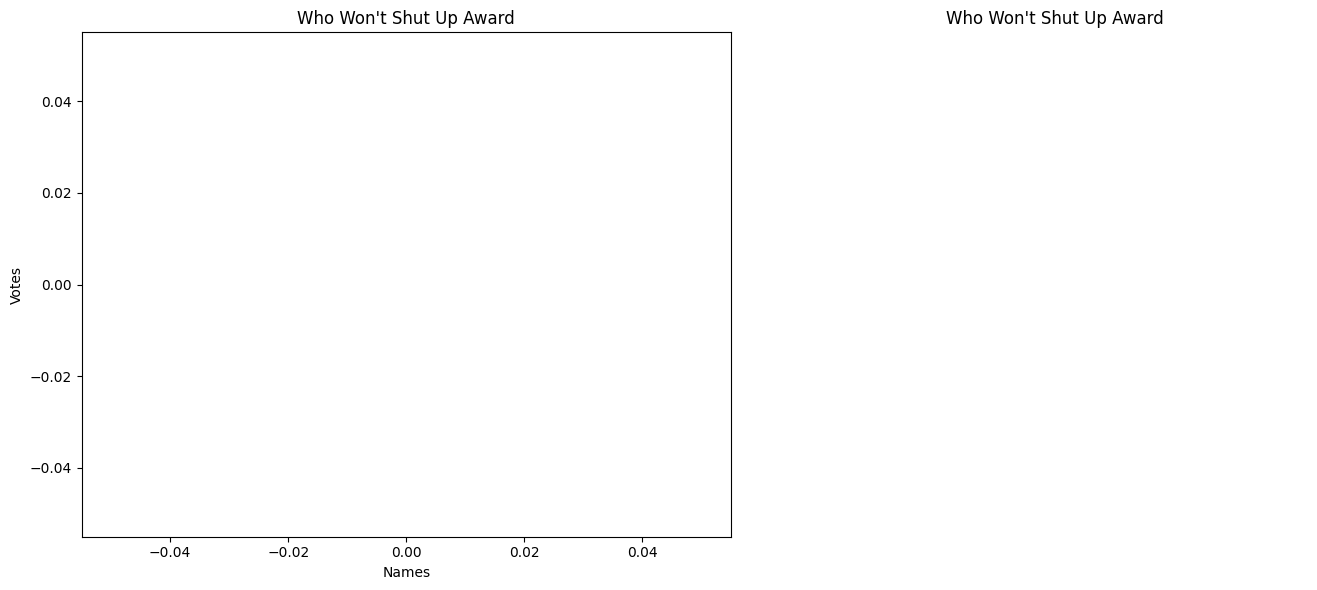

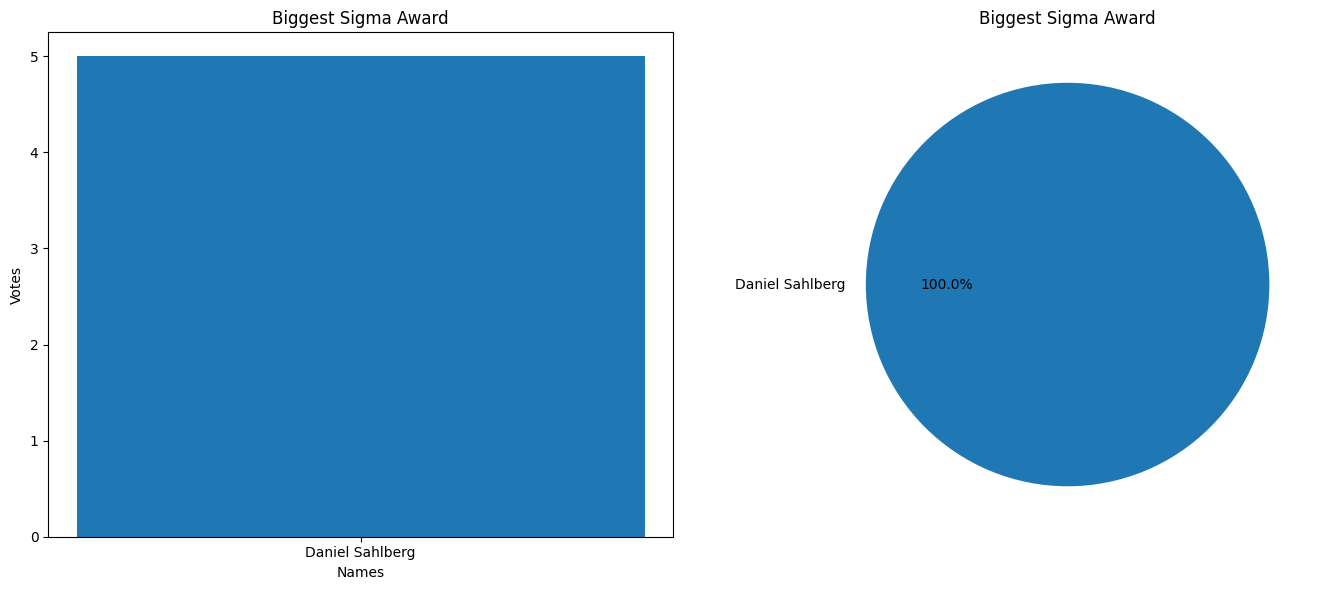

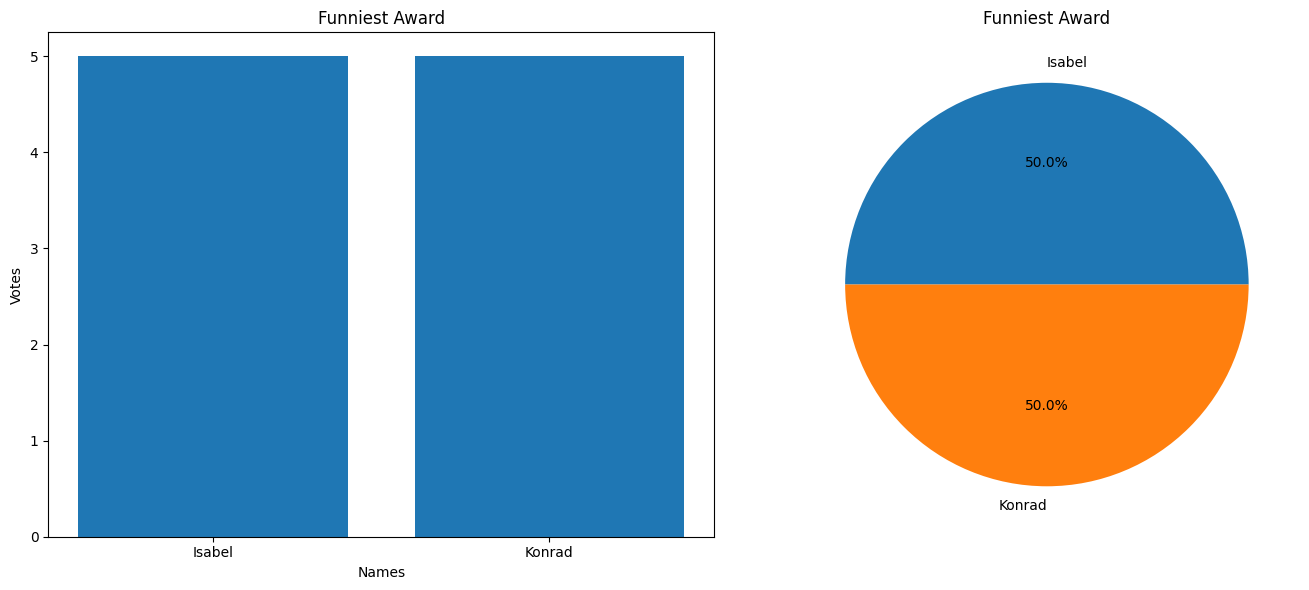

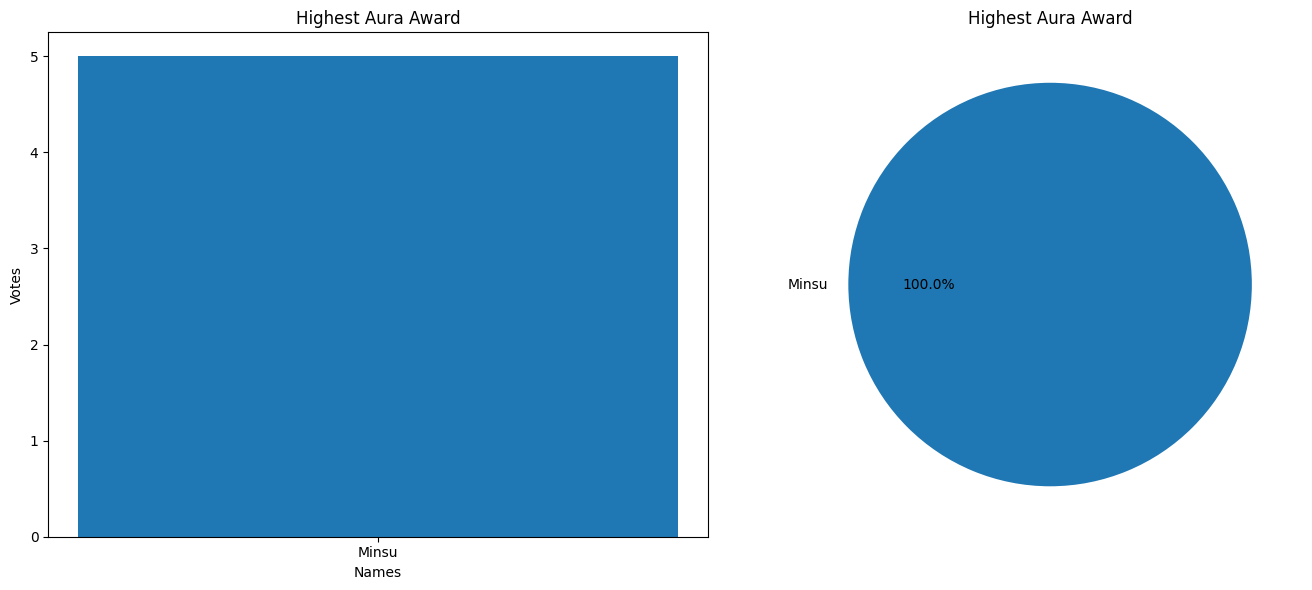

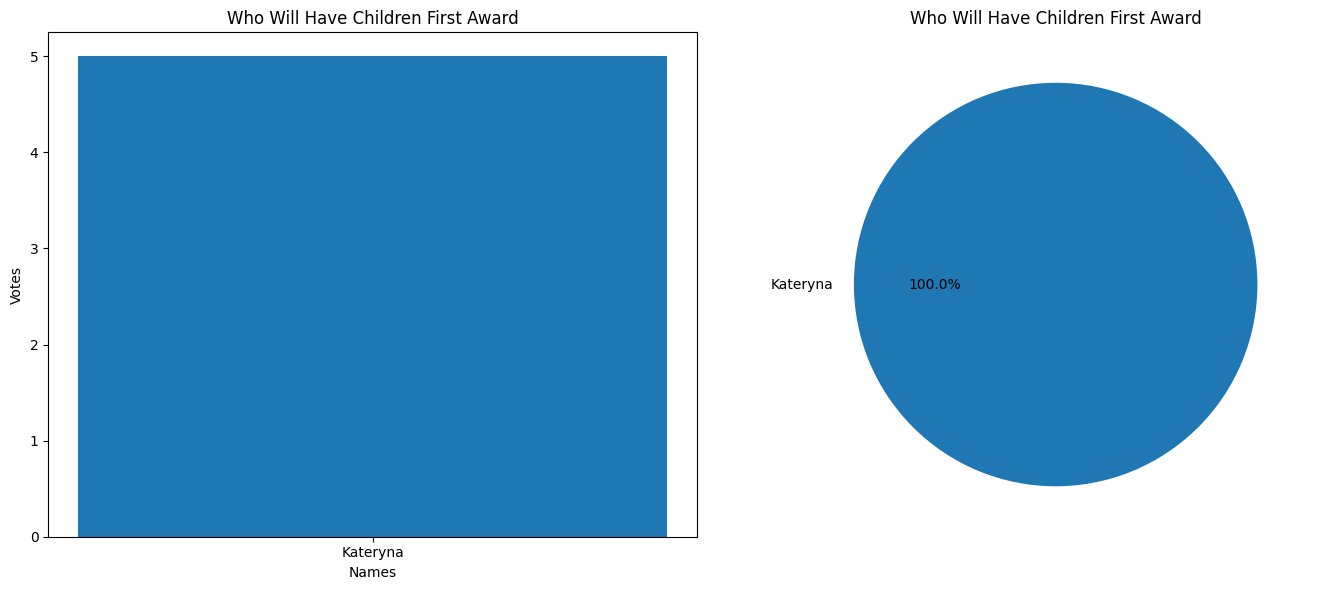

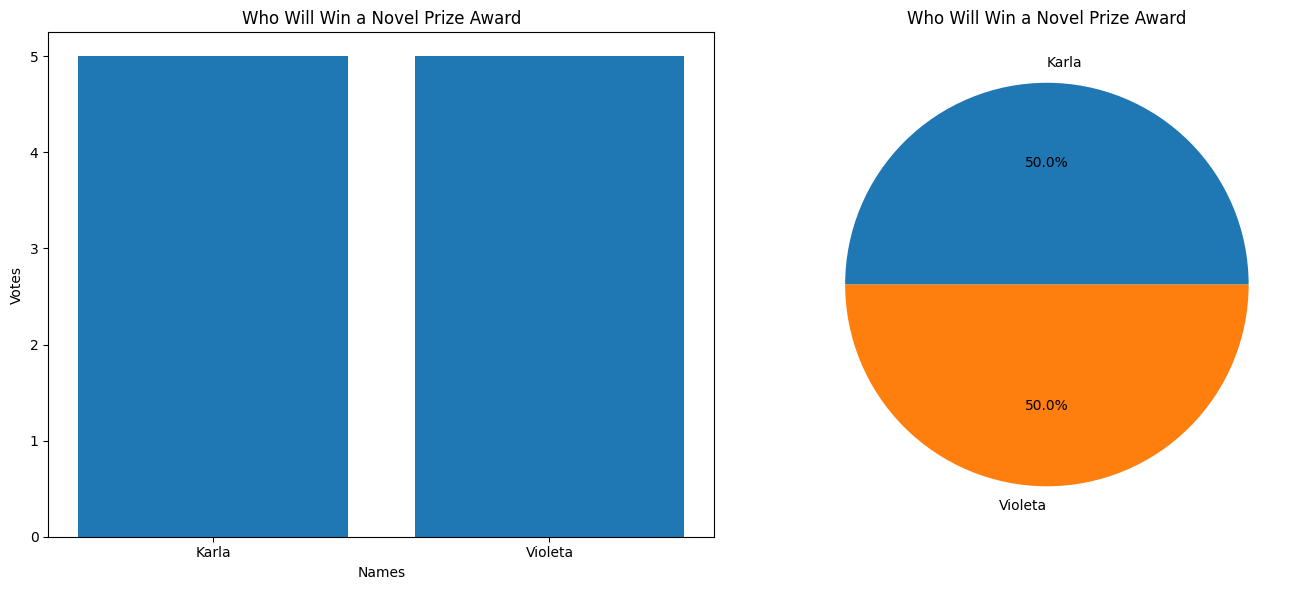

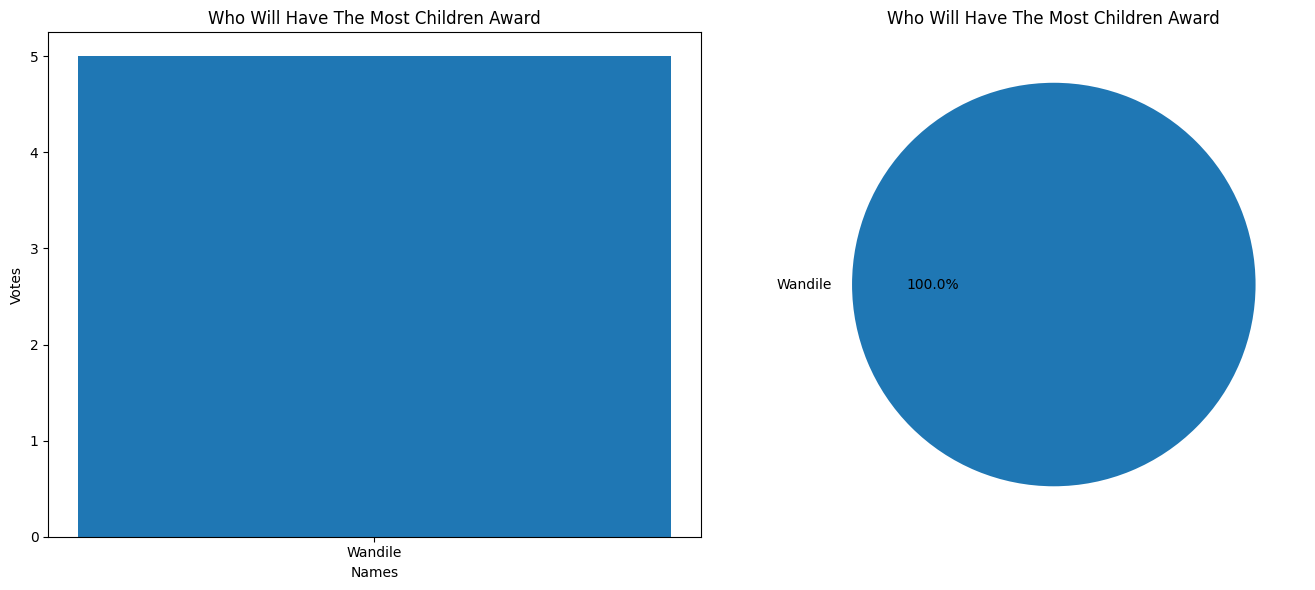

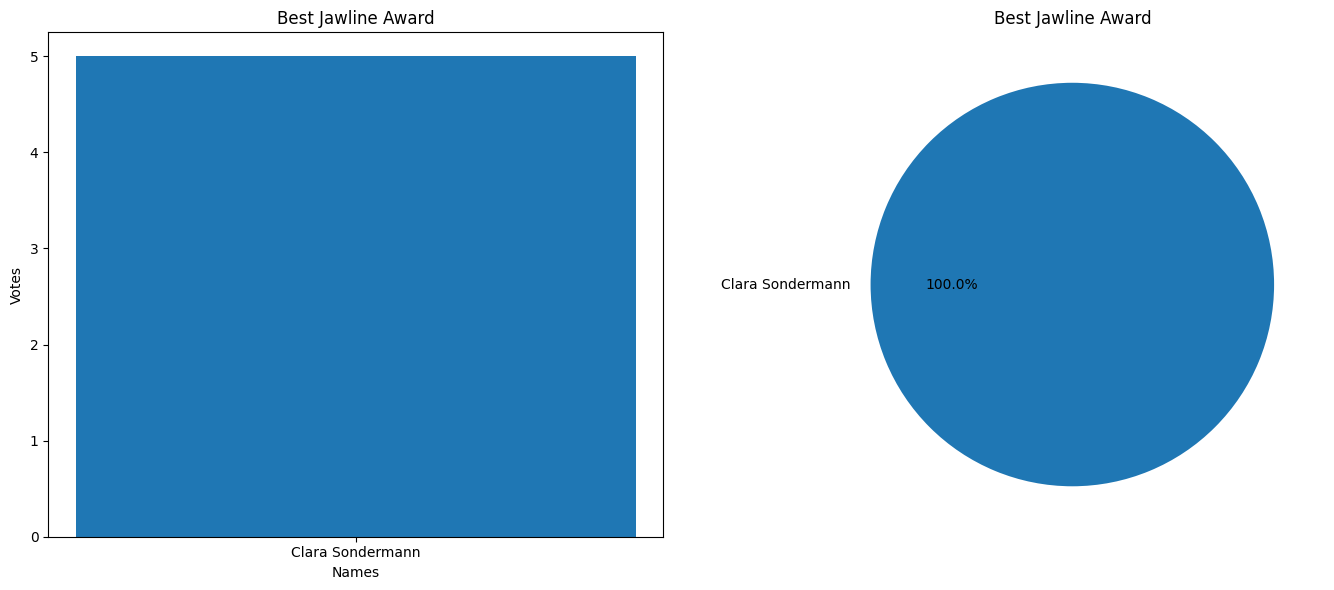

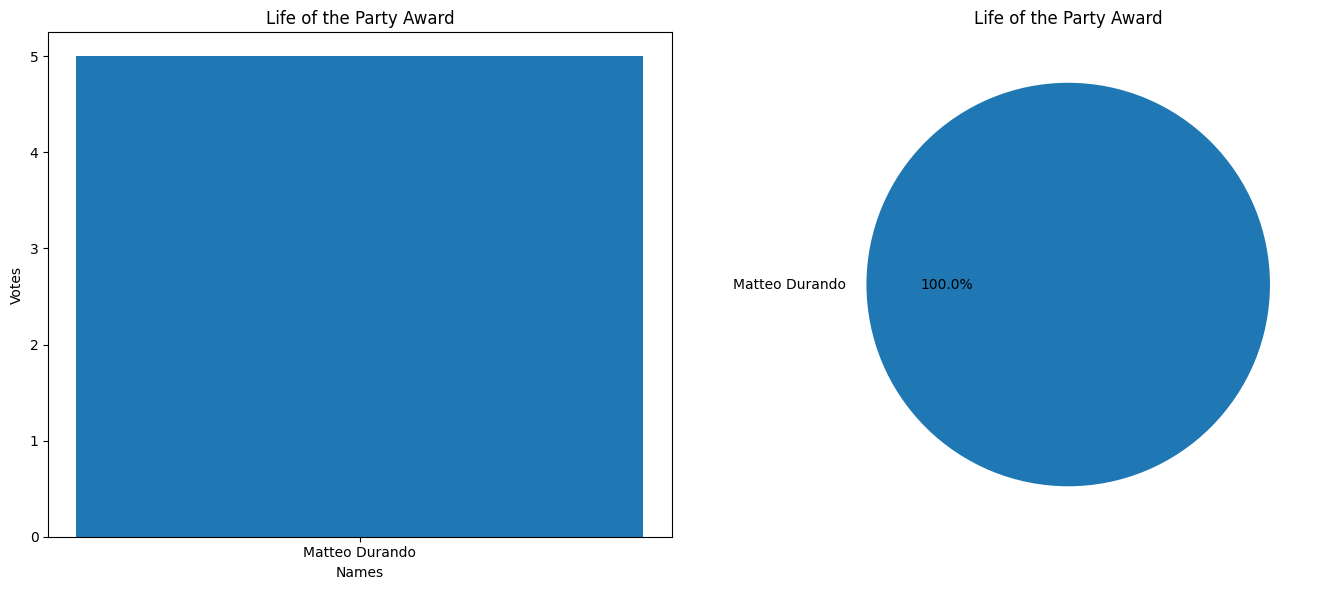

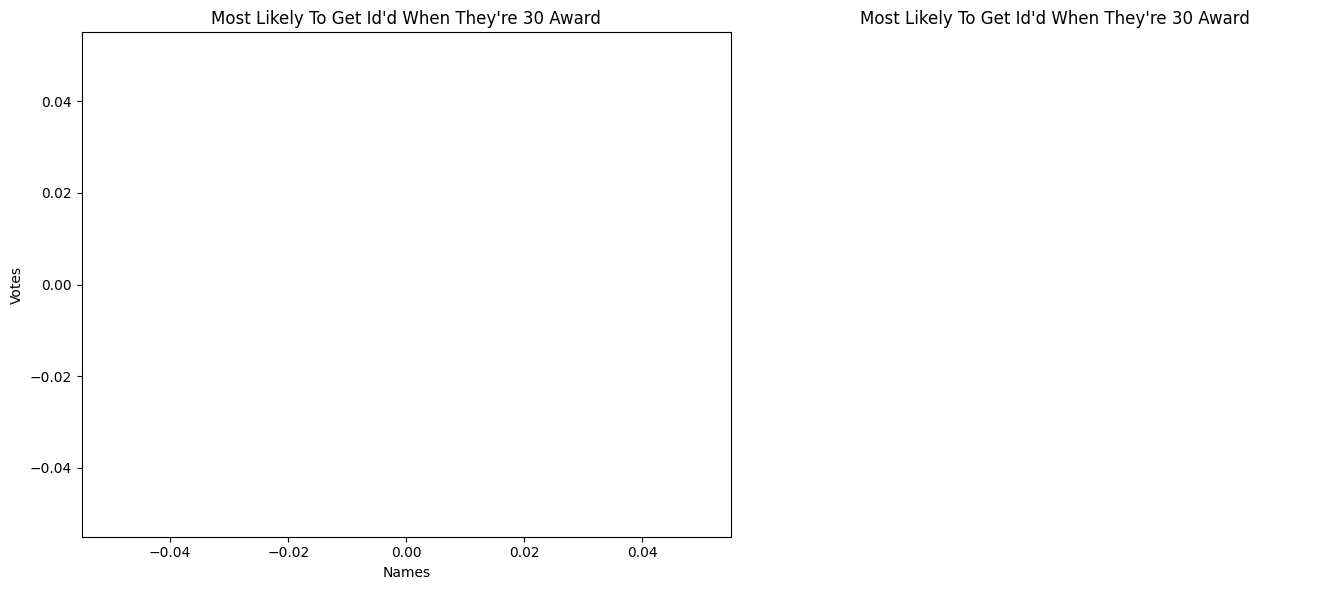

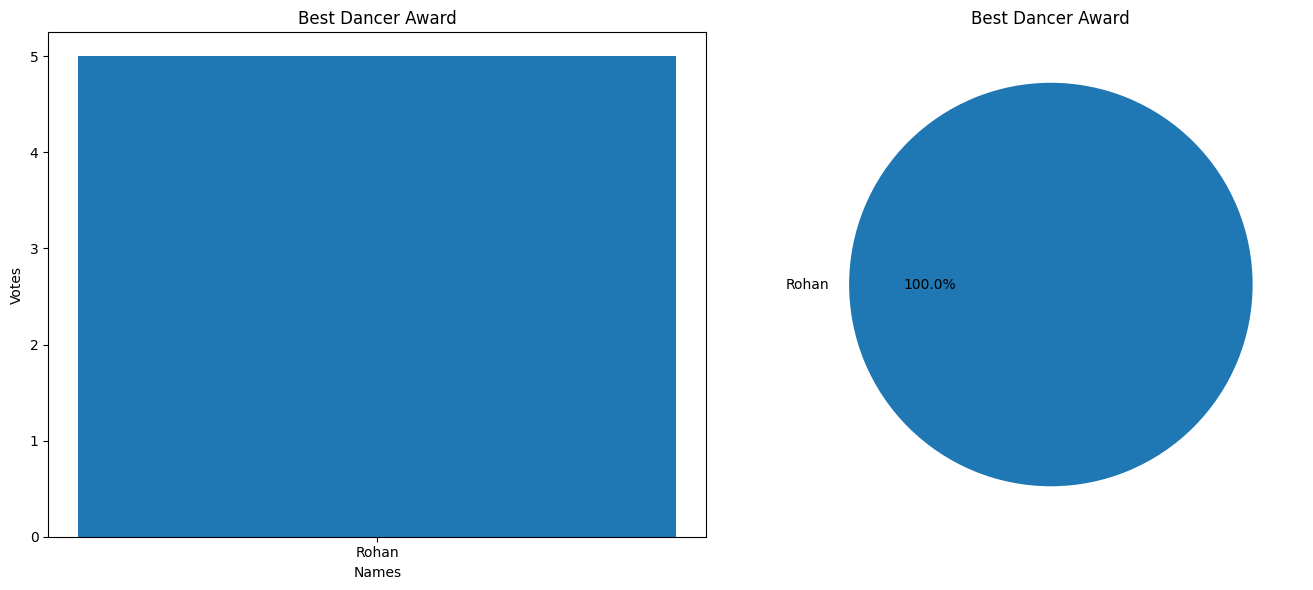

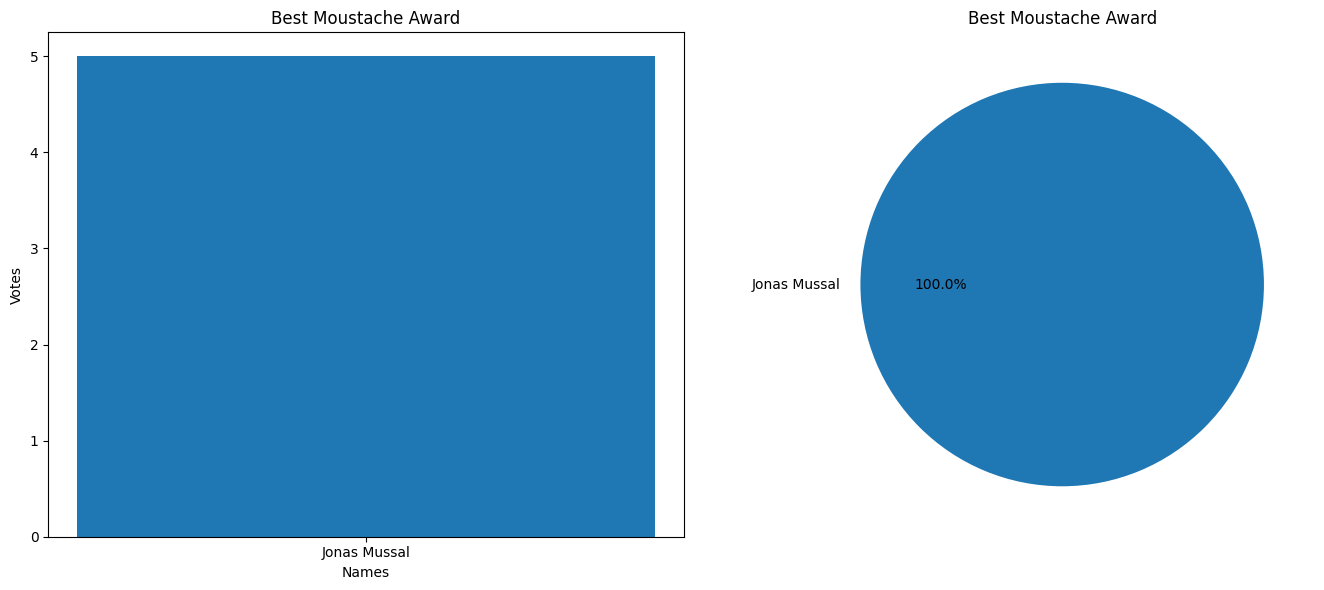

In [120]:
import json
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/home/jotaalvim/QForms/awards_uploads/awards.json'

with open(file_path, 'r') as file:
    entries= []
    for line in file.read().splitlines():
        entries.append(json.loads(line))


def count_people(award, form, multiple): #form :: List(Dics)
    count = {}
    for response in form:
        votes = response.get(award,[])
        if type(votes) != type([]):
                votes = [votes]
        if multiple:
            if votes != []:
                p = ' + '.join(votes) + '<3'
                if p not in count:
                    count[p] = 1
                else:
                    count[p] += 1
        else:
            for p in votes:
                if p not in count:
                    count[p] = 1
                else:
                    count[p] += 1
    return count




title, *forms = entries

def draw(list_awards,multiple=False):
    for a in list_awards:
        title = a
        c = count_people(a,forms,multiple)
        names = list(c.keys())
        counts = list(c.values())
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))

        # Bar Plot on the first subplot (left)
        axs[0].bar(names, counts)
        axs[0].set_title(a)
        axs[0].set_xlabel('Names')
        axs[0].set_ylabel('Votes')

        # Pie Chart on the second subplot (right)
        axs[1].pie(counts, labels=names, autopct='%1.1f%%')
        axs[1].set_title(a)

        plt.tight_layout()
        plt.show()


multiple = [ 'Choose 2 people - Best Couple Award', 'Choose 3 people - Best Throuple Award']

awards = [ 'Best Dressed Award', 'Best Climber Award', 'Biggest Yank Award', 'Most Chilled Award', 'Least Chilled Award', 'Most Kindest Award', 'Fastest Speaker Award', 'Who Lost The Most of Their Possesions Award', 'Most Likely to Skip Work to sleep Award', 'Worst Lecture Attendance Award', 'Most Likely to Go to Space Award', 'Multiple Marriages Award', 'Best Chef Award', 'Worst Chef Award', "Who Won't Shut Up Award", 'Biggest Sigma Award', 'Funniest Award', 'Highest Aura Award', 'Who Will Have Children First Award', 'Who Will Win a Novel Prize Award', 'Who Will Have The Most Children Award', 'Best Jawline Award', 'Life of the Party Award', "Most Likely To Get Id'd When They're 30 Award", 'Best Dancer Award', 'Best Moustache Award']
draw(multiple, True)
draw(awards)

